<a href="https://colab.research.google.com/github/AriqF1/dataMining/blob/main/DataWorkout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pra Pemrosesan Data

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [39]:
import pandas as pd

# Baca file CSV dengan pembatas yang benar (misalnya, menggunakan titik koma)
df = pd.read_csv('gym_track.csv', delimiter=';')

# Tampilkan 5 baris pertama data
print("Data dengan pembatas titik koma:")
print(df.head())

# Simpan kembali file CSV jika perlu
df.to_csv('gym_track1.csv', index=False)


Data dengan pembatas titik koma:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Ex

In [40]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [41]:
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [53]:
# Rata Rata Usia
average_age = df['Age'].mean()

print(f"Rata-rata usia: {average_age}")

Rata-rata usia: 38.68345323741007


In [44]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Gender'].astype(str).value_counts(dropna=False)
print(value_counts)

Gender
Male      511
Female    462
Name: count, dtype: int64


In [46]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['BMI'].astype(str).value_counts(dropna=False)

print(value_counts)

BMI
23.53    5
23.88    4
22.48    4
26.47    4
21.16    4
        ..
14.88    1
15.07    1
14.36    1
44.71    1
33.38    1
Name: count, Length: 771, dtype: int64


In [47]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = df['Workout_Type'].astype(str).value_counts(dropna=False)

print(value_counts)

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


In [51]:
value_counts = df['Workout_Frequency (days/week)'].astype(str).value_counts(dropna=False)

print(value_counts)

Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64


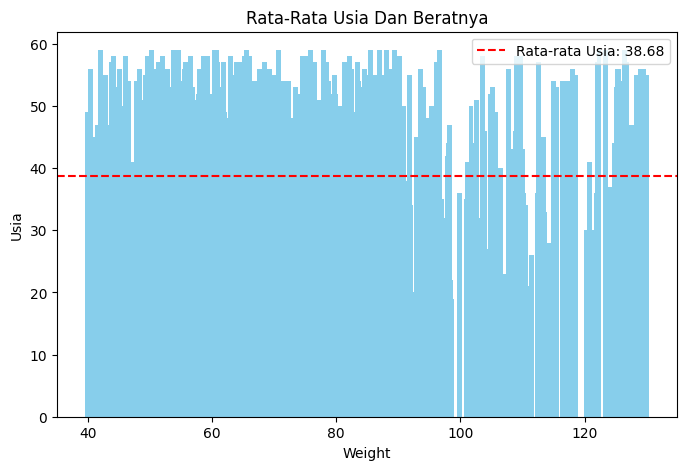

In [56]:
import matplotlib.pyplot as plt

# Buat bar chart untuk usia individu
plt.figure(figsize=(8, 5))
plt.bar(df['Weight (kg)'], df['Age'], color='skyblue', label='')

# Tambahkan garis horizontal untuk rata-rata usia
plt.axhline(y=average_age, color='red', linestyle='--', label=f'Rata-rata Usia: {average_age:.2f}')

# Tambahkan label dan judul
plt.title('Rata-Rata Usia Dan Beratnya')
plt.xlabel('Weight')
plt.ylabel('Usia')
plt.legend()

# Tampilkan grafik
plt.show()


In [57]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 973 entries, (';Female;18/04/1997;27;Premium;4;Mon', ' Sat', ' Tue', ' Wed;TRUE;Kickboxen', ' BodyPump') to (';Female;07/05/2006;18;Premium;2;Thu', ' Tue;FALSE;;16:41:00;19:00:00;139;TRUE;passion_fruit', ' coconut_pineapple;FALSE;;FALSE', nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                             --------------  ----- 
 0   ;gender;birthday;Age;abonoment_type;visit_per_week;days_per_week;attend_group_lesson;fav_group_lesson;avg_time_check_in;avg_time_check_out;avg_time_in_gym

## Konversi Nilai ke Numerik

In [58]:
# label_encoder = LabelEncoder()
# datasets['PARITAS'] = label_encoder.fit_transform(datasets['PARITAS'])

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(df[['Workout_Type']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['Workout_Type'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
df = pd.concat([df.drop('Workout_Type', axis=1), one_hot_df], axis=1)

In [64]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Ubah kolom Gender menjadi integer
df['Gender'] = le.fit_transform(df['Gender'])

print("Data setelah Label Encoding:")
print(df)


Data setelah Label Encoding:
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Fat_Percen

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Fat_Percentage                 973 non-null    float64
 10  Water_Intake (liters)          973 non-null    float64
 11  Workout_Frequency (days/week)  973 non-null    int64  
 12  Experience_Level               973 non-null    int

In [67]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0.0,0.0,0.0,1.0
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1.0,0.0,0.0,0.0
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0.0,0.0,1.0,0.0
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,0.0,0.0,1.0,0.0
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,0.0,0.0,1.0,0.0
970,59,0,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,1.0,0.0,0.0,0.0
971,32,1,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,0.0,1.0,0.0,0.0


In [ ]:
datasets.to_csv('datasets-jadi.csv', index=False)